In [1]:
import pandas as pd
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")

In [2]:
dfC = pd.read_pickle('HUReviewsTest.pkl')
dfM = pd.read_pickle('HUmeta.pkl')

In [3]:
dfC.sort_values('hike')

,hike,url,commenter,hikeDate,rating,description
2121,Annapolis Rock/Black Rock Cliff Hike,https://www.hikingupward.com/all_reviews.asp?H...,By: Susanna,2017-07-16,4,This was a beautiful (albeit crowded) hike -- ...
2120,Annapolis Rock/Black Rock Cliff Hike,https://www.hikingupward.com/all_reviews.asp?H...,By: Lyn,2017-10-22,4,This is a very nice hike. You have to walk a l...
2137,Annapolis Rock/Black Rock Cliff Hike,https://www.hikingupward.com/all_reviews.asp?H...,"<!-- var contact = ""Gary D."" var posteddate ...",1912-07-22,3,"Sunday, starting at 0825. Hike time. including..."
2136,Annapolis Rock/Black Rock Cliff Hike,https://www.hikingupward.com/all_reviews.asp?H...,By: John,1914-05-18,4,This is a good hike for kids who can walk a fe...
2135,Annapolis Rock/Black Rock Cliff Hike,https://www.hikingupward.com/all_reviews.asp?H...,"<!-- var contact = ""ajw"" var posteddate = ""7...",2011-07-31,3,"As HU observed, definitely not for anyone who ..."
...,...,...,...,...,...,...
17,Woodstock Tower Hike,https://www.hikingupward.com/all_reviews.asp?H...,By: mike,2012-02-04,3,"The view is great, trash along the trail not s..."
18,Woodstock Tower Hike,https://www.hikingupward.com/all_reviews.asp?H...,"<!-- var contact = ""Zachary Taylor"" var post...",2011-02-27,4,The Woodstock Tower provides the best view ava...
19,Woodstock Tower Hike,https://www.hikingupward.com/all_reviews.asp?H...,By: Bryan G,2010-10-24,1,Well we were short on time so we looked for a ...
15,Woodstock Tower Hike,https://www.hikingupward.com/all_reviews.asp?H...,By: Hobo Hiker,2017-08-05,5,I enjoyed the tower hike as a very quick simpl...


## Rating EDA
People just generaly rate things really high

Description:
 count    4897.000000
mean        3.930570
std         0.888193
min         1.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64

Missing ratings:  0


Text(0.5, 1.0, 'Count of Ratings')

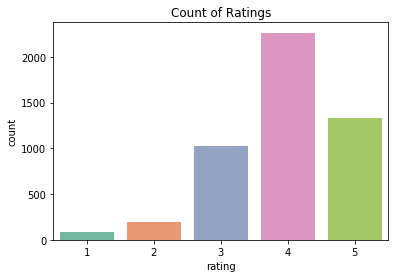

In [4]:
#first want to get a holistic view of the rating
dfC.rating = dfC.rating.apply(int)
print('Description:\n', dfC.rating.describe())
print('\nMissing ratings: ', dfC.rating.isna().sum())
sns.countplot(dfC.rating, palette = 'Set2')
plt.title('Count of Ratings')

## Comments' Sentiment v. Rating
Higher rated hikes do have higher sentiment values

### Creating the sentiment variable

In [5]:
def get_sentiment(document):
    try:
        #drop non-alpha, keep some punctuation in raw text
        document = re.sub('[^a-z0-0\.?!\',]', ' ', document.lower())
        blob = TextBlob(document.lower())
        sentiment = blob.sentiment.polarity
        
        return sentiment
    
    except:
        return None

In [6]:
print('Example hike:\n', dfC.description[19])

print('\nSentiment: ', round(get_sentiment(dfC.description[19]), 2))

print('\nExample hike:\n', dfC.description[250])

print('\nSentiment: ', round(get_sentiment(dfC.description[250]), 2))

#TODO: try different sentiment function

Example hike:
 Well we were short on time so we looked for a short hike and found this one. Figured the kids would like it. The trail head is actually in a camp ground and starts on an ATV trail. Walking on the ATV trail was a little difficult but it doesn't last for long. We did read that you can just park and go to the tower (about a 50 foot walk). The hike has a pretty decent ascent as you work the second leg of the cut backs, nothing to intense though. Well we made our way to the tower and thats the part we disliked. Trash was everywhere, lots of beer cans!! We encountered a lot of people at the tower that had just driven up there. The view was nice, but the people and the trash bothered me to much. We usually teach the kids if we encounter any trash on the trail we pick it up, we would of been up there for hours if we tried to clean that place up. If you want a great view and a short hike in this area go for buzzards's rock on of my families favorites!!

Sentiment:  0.06

Example 

In [7]:
dfC['sentiment'] = dfC.description.apply(get_sentiment)

## Comparing sentimet to the rating

count    4897.000000
mean        0.191735
std         0.133464
min        -0.400000
25%         0.111448
50%         0.178889
75%         0.261111
max         1.000000
Name: sentiment, dtype: float64


Text(0.5, 1.0, 'Rating by Sentiment')

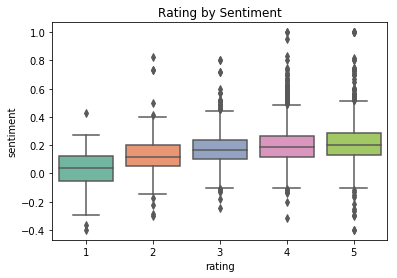

In [8]:
print(dfC.sentiment.describe())

sns.boxplot(x="rating", y="sentiment", data=dfC, palette = 'Set2')
plt.title('Rating by Sentiment')

## Other Variables v. Rating

### Creating an average rating and sentiment for each hike

In [9]:
dfC['hike'] = dfC.hike.apply(lambda x: x.replace(' Hike', ''))
dfG = dfC.groupby('hike')['rating', 'sentiment'].mean()
df = pd.merge(dfM, dfG, left_on = 'name', right_index = True, how = 'left')

### Understanding the variables relation to the rating variable

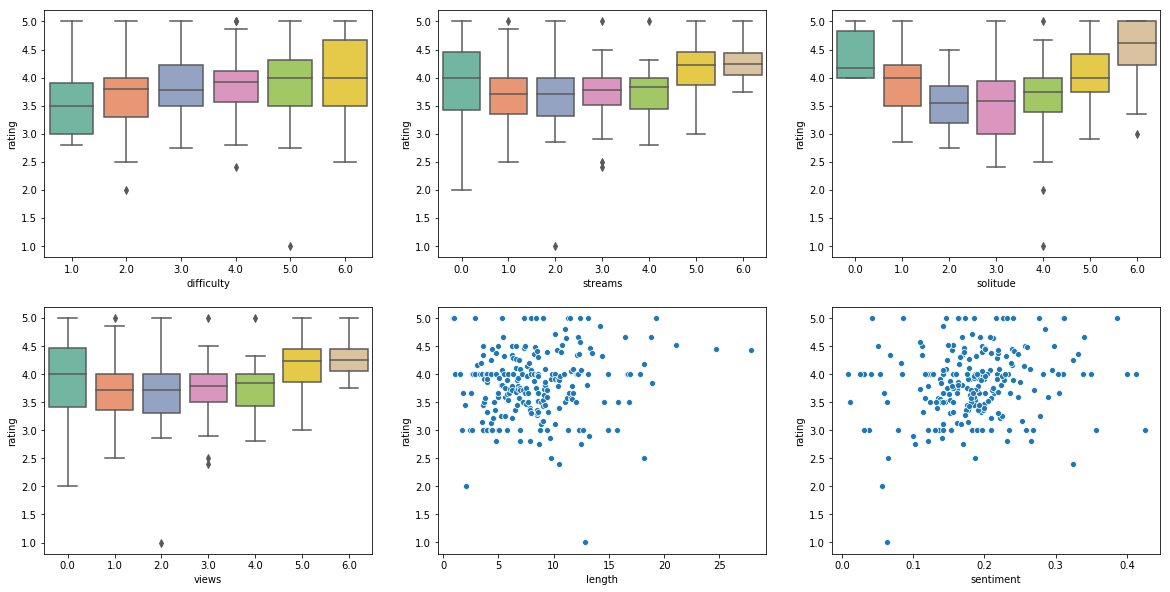

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for col in ['difficulty', 'length', 'streams', 'views', 'solitude']:
    df[col] = df[col].apply(float)

sns.boxplot(x="difficulty", y="rating", data=df, palette = 'Set2', ax = axes[0, 0])
#people who really like hikes in general like the really hard ones?

sns.boxplot(x="views", y="rating", data=df, palette = 'Set2', ax = axes[1, 0])
#surpised there isn't more of a trend here; you would think good views = good hike

sns.boxplot(x="streams", y="rating", data=df, palette = 'Set2', ax = axes[0, 1])
#lots of water is definitely makes for a good hike

sns.scatterplot(x="length", y="rating", data=df, palette = 'Set2', ax = axes[1, 1])
#apparently people generally know what they're getting themselves into :)

sns.boxplot(x="solitude", y="rating", data=df, palette = 'Set2', ax = axes[0, 2])
#popular hikes have more people because they're really good hikes, quiet hikes are nice because they're quiet

sns.scatterplot(x="sentiment", y="rating", data=df, palette = 'Set2', ax = axes[1, 2])
#people just really rate hikes highly, again should prob try a different sentiment fn

## Testing just a OLS model

In [11]:
rating_variables = sm.ols(formula="rating ~ streams + views + solitude + sentiment", data=df).fit()
print(rating_variables.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     8.624
Date:                Sun, 07 Jun 2020   Prob (F-statistic):           1.93e-05
Time:                        20:02:51   Log-Likelihood:                -201.71
No. Observations:                 227   AIC:                             411.4
Df Residuals:                     223   BIC:                             425.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9269      0.180     16.253      0.0